In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
from PIL import Image

### Here we try to present The Plots

In [2]:
# def plot_one(ax, npz_file, color=None):
#     a = np.load(npz_file)
#     assert len(a["timesteps"]) == len(a["results"])
#     x = a["timesteps"]
#     y = [rewards.mean() for rewards in a["results"][:]]
#     if color is not None:
#         ax.plot(x, y, color = color)
#     else:
#         ax.plot(x, y)
#     return

def plt_plot_one(npz_file, color=None, label=None):
    a = np.load(npz_file)
    assert len(a["timesteps"]) == len(a["results"])
    x = a["timesteps"]
    y = [rewards.mean() for rewards in a["results"][:]]
    # print(sum(y[-5:])/5)
    print(y)
    if color is not None:
        if label is not None:
            plt.plot(x, y, color = color, label=label)
        else:
            plt.plot(x, y, color = color)
    else:
        plt.plot(x, y)
    return

def plot_dict(dict):
    for k in dict.keys():
        plt_plot_one(dict[k][0], dict[k][1], dict[k][2])
    return

In [3]:
# npz_path = "/net/papilio/storage2/yhaoyuan/transformer_I2S/egs/RL_1_3/logs_reproduce_2048_no_sentence/evaluations.npz"
# npz_path = "/net/papilio/storage2/yhaoyuan/transformer_I2S/egs/RL_1_3/logs_ddpg_hard_img/evaluations.npz"
g = "gainsboro"
r = "red"
npz_paths_reproduce = {}
npz_paths_reproduce["logs_reproduce_50_no_sentence"] = ["./results/logs_reproduce_50_no_sentence/evaluations.npz", g]
npz_paths_reproduce["logs_reproduce_2048_no_sentence"] = ["./results/logs_reproduce_2048_no_sentence/evaluations.npz", g]
npz_paths_reproduce["logs_reproduce_50"] = ["./results/logs_reproduce_50/evaluations.npz", g]
npz_paths_reproduce["logs_reproduce_2048"] = ["./results/logs_reproduce_2048/evaluations.npz", g]

npz_paths_new = {}
npz_paths_new["logs_ddpg_hard_img"] = ["./results/logs_ddpg_hard_img/evaluations.npz", g]
npz_paths_new["logs_ddpg_hard_img_no_sentence"] = ["./results/logs_ddpg_hard_img_no_sentence/evaluations.npz", g]
npz_paths_new["logs_ddpg_soft_img_no_sentence"] = ["./results/logs_ddpg_soft_img_no_sentence/evaluations.npz", g]
npz_paths_new["logs_ddpg_record_choosepos"] = ["./results/logs_ddpg_record_choosepos/evaluations.npz", g]
npz_paths_new["logs_ddpg_new_fixed_image_no_sentence"] = ["./results/logs_ddpg_new_fixed_image_no_sentence/evaluations.npz", r]
npz_paths_new["logs_ddpg_new_fixed_image_8_sentence"] = ["./results/logs_ddpg_new_fixed_image_8_sentence/evaluations.npz", "b"]

npz_paths_hubert = {}
# npz_paths_hubert["logs_ddpg_256_hubert_no_sentence"] = ["./logs_ddpg_256_hubert_no_sentence/evaluations.npz", g]
# npz_paths_hubert["logs_ddpg_256_hubert_no_sentence_hard"] = ["./logs_ddpg_256_hubert_no_sentence_hard/evaluations.npz", g]
# npz_paths_hubert["logs_ddpg_256_hubert_no_sentence_sanity"] = ["./logs_ddpg_256_hubert_no_sentence_sanity/evaluations.npz", r]
# npz_paths_hubert["logs_ddpg_256_hubert_no_sentence_sanity_no_norm"] = ["./logs_ddpg_256_hubert_no_sentence_sanity_no_norm/evaluations.npz", r]
# npz_paths_hubert["logs_ddpg_256_hubert_no_sentence_sanity_pos"] = ["./logs_ddpg_256_hubert_no_sentence_sanity_pos/evaluations.npz", r]
npz_paths_hubert["logs_ddpg_256_baseline_VC_no_sentence_pos"] = ["./results/logs_ddpg_256_baseline_VC_no_sentence_pos/evaluations.npz", "b"]
npz_paths_hubert["logs_ddpg_256_hubert_VC_no_sentence_pos"] = ["./results/logs_ddpg_256_hubert_VC_no_sentence_pos/evaluations.npz", 'r']

npz_paths_sentence_hubert = {}
npz_paths_sentence_hubert["Origin_No_Embed_Codec"] = ["./results/logs_all_info_no_embed_codec/evaluations.npz", "C0", "Mode_1_Codec"]
npz_paths_sentence_hubert["Origin_No_Embed_Prefix"] = ["./results/logs_all_info_no_embed_prefix/evaluations.npz", "C1", "Mode_1_Prefix"]
# npz_paths_sentence_hubert["Sen_No_Embed_Codec"] = ["./results/logs_part_info_no_embed_codec/evaluations.npz", g, ""]
npz_paths_sentence_hubert["Sen_8_Embed_Codec"] = ["./results/logs_part_info_8_embed_codec/evaluations.npz", "C2", "Mode_2_Codec"]
npz_paths_sentence_hubert["Sen_8_Embed_Prefix"] = ["./results/logs_part_info_8_embed_prefix/evaluations.npz", "C3", "Mode_2_Prefix"]
# npz_paths_sentence_hubert["Sen_8_Embed_Codec_3"] = ["./results/logs_part_info_8_embed_codec_3_caps/evaluations.npz", "C4", "Mode_3_Codec"]
# npz_paths_sentence_hubert["Sen_8_Embed_Prefix_3"] = ["./results/logs_part_info_8_embed_prefix_3_caps/evaluations.npz", "C5", "Mode_3_Prefix"]
npz_paths_sentence_hubert["Sen_8_Embed_Prefix_half_lr"] = ["./results/logs_part_info_8_embed_codec_half_lr", "r", "Mode_2_half_lr"]

npz_paths_emnlp = {}
npz_paths_emnlp["Baseline"] = ["./results/logs_emnlp_codec_baseline_pikaia19/evaluations.npz", "C0", "Baseline_8*8"]
# npz_paths_emnlp["Baseline_7"] = ["./results/logs_emnlp_codec_baseline_7*7_pikaia23/evaluations.npz", "C1", "Baseline_7*7"]
npz_paths_emnlp["Prefix_8"] = ["./results/logs_emnlp_codec_prefix_8*8_pikaia25/evaluations.npz", "C2", "Prefix_8"]
npz_paths_emnlp["Prefix_8_10_percent"] = ["./results/logs_emnlp_prefix_10_percent_pikaia24/evaluations.npz", "C3", "Prefix_8_10_percent"]
npz_paths_emnlp["Prefix_8_20_percent"] = ["./results/logs_emnlp_prefix_20_percent_pikaia28/evaluations.npz", "C4", "Prefix_8_20_percent"]
npz_paths_emnlp["BBB"] = ["/net/papilio/storage2/yhaoyuan/transformer_I2S/egs/RL_1_3/prev_results/logs_ddpg_soft_img_no_sentence/evaluations.npz", "C5", "BBB"]
# npz_paths_emnlp["Baseline_dim_50"] = ["./results/logs_emnlp_baseline_rl_dim_50_pikaia31/evaluations.npz", "C5", "baseline_50"]

npz_paths_graduation = {}
npz_paths_graduation["Baseline"] = ["./results/logs_all_info_no_embed_codec/evaluations.npz", "C0", "Baseline"]
npz_paths_graduation["Prefix"] = ["./results/logs_all_info_no_embed_prefix/evaluations.npz", "C1", "Proposed"]

[0.461, 0.538, 0.61, 0.636, 0.664, 0.69, 0.678, 0.672, 0.68, 0.7, 0.695, 0.717, 0.697, 0.689, 0.675, 0.696, 0.685, 0.707, 0.701, 0.699, 0.735, 0.718, 0.697, 0.742, 0.706, 0.721, 0.701, 0.71, 0.728, 0.72, 0.709, 0.69, 0.719, 0.721, 0.698, 0.704, 0.688, 0.718, 0.728, 0.69, 0.686, 0.698, 0.742, 0.704, 0.719, 0.696, 0.748, 0.711, 0.739, 0.719]
[0.547, 0.608, 0.657, 0.709, 0.71, 0.684, 0.746, 0.721, 0.728, 0.755, 0.751, 0.749, 0.734, 0.785, 0.766, 0.759, 0.769, 0.791, 0.763, 0.763, 0.787, 0.802, 0.762, 0.766, 0.767, 0.774, 0.779, 0.775, 0.778, 0.753, 0.772, 0.752, 0.775, 0.802, 0.769, 0.789]


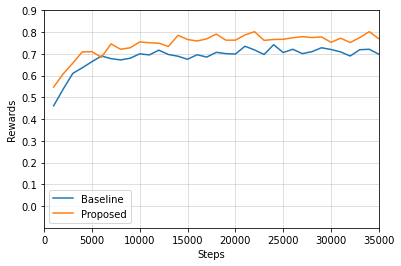

In [7]:
# Set figure
x_range = 35000
y_range = 0.9
intervals = int(y_range/0.1 + 1)
plt.figure()
plt.xlim([0,x_range])
plt.ylim([-0.1,y_range])
plt.xticks(np.linspace(0, x_range, 8))
plt.yticks(np.linspace(0, y_range, 10))
plt.xlabel("Steps")
plt.ylabel("Rewards")
plt.title("")
# ax.set_xsticks

plt.grid(which="major", alpha = 0.5)
plt.grid(which="minor", alpha = 0.1)
plot_dict(npz_paths_graduation)
plt.legend()
plt.savefig("Results_ASJ.pdf", bbox_inches='tight')
# plt_plot_one(npz_path, 'gainsboro')


In [15]:
import numpy

In [3]:
import h5py

In [4]:
numpy.__version__

'1.21.0'

In [6]:
import tensorflow

2023-06-17 19:25:26.244156: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 19:25:30.096649: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-17 19:25:30.097059: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-17 19:25:30.097066: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv